# Restaurant Rating Prediction

## Model Training

## 1.1 Import Data and Required Packages

### importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [49]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns



from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Modelling
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV

import warnings

## Import the CSV Data as Pandas DataFrame

In [50]:
df = pd.read_csv('zomato.csv/zomato_cleaned_data.csv')

### Show Top 5 Records

In [51]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cost2plates,category,grouped_cuisines
0,jalsa,Yes,Yes,4.1,41,Banashankari,Casual Dining,800.0,Buffet,North Indian Cuisine
1,spice elephant,Yes,No,4.1,41,Banashankari,Casual Dining,800.0,Buffet,North Indian Cuisine
2,san churro cafe,Yes,No,3.8,41,Banashankari,Others,800.0,Buffet,Western Cuisine
3,addhuri udupi bhojana,No,No,3.7,88,Banashankari,Quick Bites,300.0,Buffet,North Indian Cuisine
4,grand village,No,No,3.8,166,Basavanagudi,Casual Dining,600.0,Buffet,North Indian Cuisine


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              51717 non-null  object 
 1   online_order      51717 non-null  object 
 2   book_table        51717 non-null  object 
 3   rate              51717 non-null  float64
 4   votes             51717 non-null  int64  
 5   location          51717 non-null  object 
 6   rest_type         51717 non-null  object 
 7   cost2plates       51717 non-null  float64
 8   category          51717 non-null  object 
 9   grouped_cuisines  51717 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 3.9+ MB


## Preparing X and Y variables

In [52]:
X = df.drop(['rate'], axis = 1)
y = df['rate']

y.head()

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

## Train Test Split

In [53]:
# separate dataset into train and test
X_train_df, X_test_df, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
print(X_train_df.shape, X_test_df.shape)


(41373, 9) (10344, 9)


## Feature Scaling with StandardScaler

In [54]:
numerical_columns = ["votes", "cost2plates"]
categorical_columns = ["name", "location","category", "rest_type","online_order", "book_table", "grouped_cuisines", ]

# Numerical pipeline (Standard Scaler)
num_pipeline = Pipeline(steps=[("scaler", StandardScaler())])

# Categorical pipeline (One Hot Encoder and Standard Scaler)
cat_pipeline = Pipeline(steps=[
("one_hot_encoder", OneHotEncoder(handle_unknown='ignore')),
("scaler", StandardScaler(with_mean=False))
])


# Column transformer applying the pipelines
preprocessor = ColumnTransformer(
transformers=[("num_pipeline", num_pipeline, numerical_columns),
              ("cat_pipeline", cat_pipeline, categorical_columns)
                ])

In [55]:

X_train = preprocessor.fit_transform(X_train_df)
X_test = preprocessor.transform(X_test_df)

X_test

<10344x8531 sparse matrix of type '<class 'numpy.float64'>'
	with 92696 stored elements in Compressed Sparse Row format>

## Create an Evaluate Function to give all metrics after model Training

In [56]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [57]:
models = {
    "Random Forest Regressor": RandomForestRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
}

model_list = []
r2_list = []
best_model_name = None
best_model_r2 = -float('inf')
best_model_pred = None

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)  # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate Train and Test dataset
    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')

    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)

    # Track the best model based on R2 score
    if model_test_r2 > best_model_r2:
        best_model_r2 = model_test_r2
        best_model_name = list(models.keys())[i]
        best_model_pred = y_test_pred

    print('=' * 35)
    print('\n')

print(f"The best model is: {best_model_name} with R2 score of {best_model_r2:.4f}")
print("Predictions of the best model:")
print(best_model_pred)


Random Forest Regressor
Model performance for Training set
- Root Mean Squared Error: 0.0381
- Mean Absolute Error: 0.0144
- R2 Score: 0.9907
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.0919
- Mean Absolute Error: 0.0346
- R2 Score: 0.9459


Decision Tree
Model performance for Training set
- Root Mean Squared Error: 0.0139
- Mean Absolute Error: 0.0024
- R2 Score: 0.9988
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.0952
- Mean Absolute Error: 0.0225
- R2 Score: 0.9419


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 0.1424
- Mean Absolute Error: 0.0756
- R2 Score: 0.8703
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.1903
- Mean Absolute Error: 0.1084
- R2 Score: 0.7679


The best model is: Random Forest Regressor with R2 score of 0.9459
Predictions of the best model:
[3.9   2.8   3.786 ... 3.1   3.7   

## Results

In [58]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
0,Random Forest Regressor,0.945870
1,Decision Tree,0.941913
2,K-Neighbors Regressor,0.767900


## Plot y_pred and best_model_pred

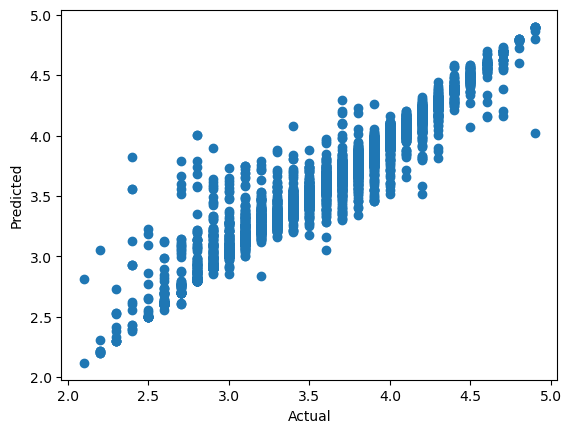

In [59]:
plt.scatter(y_test,best_model_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

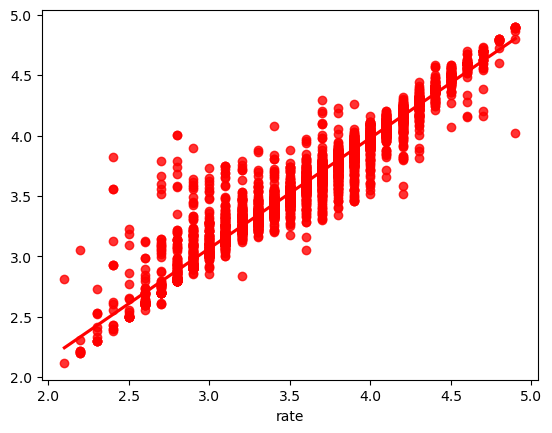

In [60]:
sns.regplot(x=y_test, y=best_model_pred, ci=None, color ='red');

## Difference between Actual and Predicted Values

In [91]:
pred_df=pd.DataFrame({'Actual Value':y_test, 'Predicted Value':best_model_pred, 'Difference':y_test-best_model_pred})
pred_df['Index'] = range(0, len(pred_df))
#pred_df.sample(20)
pred_df[pred_df['Actual Value'] > 4.5]

,Actual Value,Predicted Value,Difference,Index
38581,4.6,4.600000,-7.993606e-15,134
37542,4.6,4.600000,-7.993606e-15,268
16974,4.6,4.163000,4.370000e-01,314
44712,4.6,4.677067,-7.706667e-02,320
31068,4.7,4.730586,-3.058571e-02,373
...,...,...,...,...
19308,4.7,4.627283,7.271667e-02,9401
32657,4.8,4.800000,-7.993606e-15,9529
10284,4.9,4.800000,1.000000e-01,9965
38614,4.6,4.628725,-2.872500e-02,10008


In [92]:
# Select the row and ensure it's a 2D array
table_row = X_test_df.iloc[[9965]]  # Use double brackets to maintain it as a DataFrame

# Preprocess the row
preprocessed_row = preprocessor.transform(table_row)  

# Use the best model for prediction
prediction = models[best_model_name].predict(preprocessed_row)

print(f"The prediction for the given row is: {prediction[0]:.2f}")


The prediction for the given row is: 4.80
